# 회귀 분석

variance : 회귀식을 기준으로 퍼져있는 정도  
bias : 회귀식이 평균적으로 벗어난 정도

In [1]:
import numpy as np

x = np.array([1, 2, 3, 4])
y = np.array([6, 5, 7, 10])

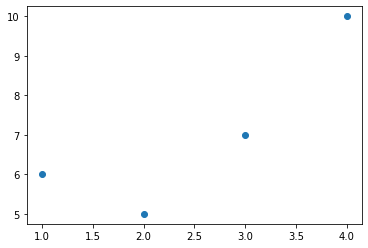

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y)

In [3]:
yhat = x * 1.4 + 3.5
f'predicted: {yhat}'

'predicted: [4.9 6.3 7.7 9.1]'

# Sympy

In [7]:
# symbolic python, 수식이나 논리명제를 풀기위해 만들어진 라이브러리
import sympy as sp
b0, b1 = sp.symbols('b0 b1')

In [8]:
f = 210 + 4 * b0 ** 2 + 30 * b1 ** 2 + 20 * b0 * b1 - 56 * b0 - 154 * b1

In [9]:
# diff(f, b0) : f함수를 b0에 대해 미분하는 명령어
fdiff_b0 = sp.diff(f, b0)
fdiff_b1 = sp.diff(f, b1)

In [10]:
print('fdiff with b0: {}\nfdiff with b1: {}'.format(fdiff_b0, fdiff_b1))

fdiff with b0: 8*b0 + 20*b1 - 56
fdiff with b1: 20*b0 + 60*b1 - 154


In [11]:
# sp.solve([풀 수식], [구할 변수 값])
exp = sp.solve([fdiff_b0, fdiff_b1], [b0, b1])
print('exp = {}'.format(exp))

exp = {b0: 7/2, b1: 7/5}


# R^2
- 회귀분석의 오류를 나타내는 지표

In [24]:
import numpy as np

x = np.arange(0, 9)
y = np.array([19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24])

In [25]:
A = np.array([x, np.ones(9)])
A

array([[0., 1., 2., 3., 4., 5., 6., 7., 8.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.]])

#### np.linalg.lstsq()
- list square로 이해하자.
- rcond = None : 기본값을 적용하지 않겠다.

In [27]:
w0, w1 = np.linalg.lstsq(A.T, y, rcond = None)[0]
print('w0: {}\nw1: {}'.format(w0, w1))

w0: 0.7166666666666672
w1: 19.188888888888897


In [28]:
yhat = w0 * x + w1
print(f'predicted: {yhat}')

predicted: [19.18888889 19.90555556 20.62222222 21.33888889 22.05555556 22.77222222
 23.48888889 24.20555556 24.92222222]


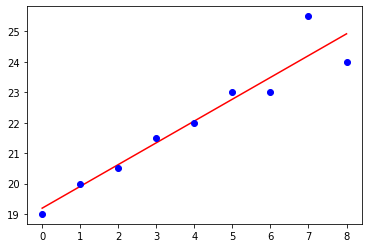

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x, yhat, 'r-', x, y, 'bo')
plt.show()

In [30]:
RSS = sum((y - yhat) ** 2) # 잔여 오류
TSS = sum((y - np.mean(y)) ** 2) # 총 오류

In [31]:
r_squared = 1 - (float(RSS)) / TSS
f'r_squared : {r_squared}'

'r_squared : 0.9138385502471171'

#### adjusted R squared
- 독립변수의 개수에 따라 과도한 R을 수정한 값이다.

In [34]:
adjusted_r_squared = 1 - (1 - r_squared) * (len(y) - 1) / (len(y) - A.shape[0] - 1)
f'adjusted_r_squared : {adjusted_r_squared}'

'adjusted_r_squared : 0.8851180669961561'

#### statsmodel을 사용한 R squared 구하기

In [36]:
import statsmodels.api as sm
result = sm.OLS(y, A.T).fit()

In [37]:
result.summary()

/Users/elplaguister/opt/anaconda3/envs/Analysis/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     74.24
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           5.66e-05
Time:                        09:51:19   Log-Likelihood:                -7.6827
No. Observations:                   9   AIC:                             19.37
Df Residuals:                       7   BIC:                             19.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7167      0.083      8.616      0.000       0.520       0.913
const         19.1889      0.396     48.458      0.000      18.253      20.125
==============================================================================
Omnibus:                        4.624   Durbin-Watson:                   3.078
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                1.154
Skew:                           0.773   Prob(JB):                        0.561
Kurtosis:                       3.830   Cond. No.                         9.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# inverse matrix

In [38]:
import numpy as np

y = [8, 9]
x = [[2, -4], [3, 6]]
f'x: {x} y: {y}'

'x: [[2, -4], [3, 6]] y: [8, 9]'

In [41]:
# 출력 시 소수점 아래 n자리를 감춘다.
np.set_printoptions(precision = 2, suppress = True)

In [42]:
# xI : 역행렬
xI = np.linalg.inv(x)
print('x inv: \n{}'.format(xI))

x inv: 
[[ 0.25  0.17]
 [-0.12  0.08]]


#### 역행렬의 정의에 맞는지 확인

In [43]:
print("identity matrix 'x * xI':\n{}".format(np.dot(x, xI)))

identity matrix 'x * xI':
[[1. 0.]
 [0. 1.]]


In [46]:
np.eye(2) == np.dot(x, xI)

array([[ True,  True],
       [ True,  True]])

### Beta

#### inverse 계산

In [47]:
v = np.array([[2, 3], [4, 5]])
vI = np.linalg.inv(v)

In [48]:
print('v = \n{}\nv.I = \n{}'.format(v, vI))

v = 
[[2 3]
 [4 5]]
v.I = 
[[-2.5  1.5]
 [ 2.  -1. ]]


In [49]:
import numpy as np

x = np.array([[2, -4], [3, 6]])
y = np.array([8, 9])

In [50]:
xI = np.linalg.inv(x)

In [52]:
w1, w2 = np.dot(xI, y)
print(w1, w2)

3.5 -0.25


In [53]:
f'{2 * w1 + (-4) * w2}'

'8.0'

In [54]:
f'{3 * w1 + 6 * w2}'

'9.0'

## numpy.linalg.solve()
- 선형 벡터식을 푸는 함수

In [55]:
np.linalg.solve(x, y)

array([ 3.5 , -0.25])

# 문제: Matrix Inverse Method 회귀모델

## beta구하기

In [74]:
import numpy as np

x = np.array([1, 2, 3, 4])
y = np.array([6, 5, 7, 10])

In [75]:
_x = np.array([x, np.ones(len(x))]).T

In [76]:
b1, b0 = np.dot(np.linalg.inv(np.dot(_x.T, _x)), np.dot(_x.T, y))
b1, b0

(1.4000000000000021, 3.499999999999993)

## numpy 최소자승법

In [77]:
yhat = b0 + b1 * x

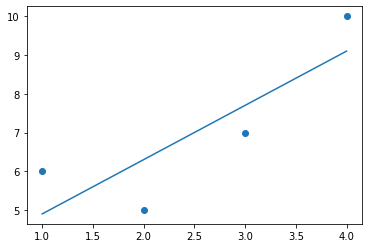

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y)
ax.plot(x, yhat)